<a href="https://colab.research.google.com/github/rohitsharma21791/rohitsharma21791/blob/main/Covid_MI1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive/')
!nvidia-smi

In [73]:
############## Reset variables###########
%reset -f

In [ ]:
############## Unrar compressed image dataset
!unrar x -Y "/content/drive/MyDrive/Gray.rar" "/content/"

In [75]:
########### Import libraries################
import os
import shutil
import cv2 as cv
import random
import numpy as np
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPooling2D,Dropout
import matplotlib.pyplot as plt


In [76]:
##########################################################

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Input, Dense, Conv2D, Conv3D, DepthwiseConv2D, SeparableConv2D, Conv3DTranspose
from keras.layers import Activation, Dropout, Flatten, Dense,Input
#from keras import backend as K
####################################################
import os
import cv2
from PIL import Image
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

from keras.layers import Concatenate, Add, Dropout, ReLU, Lambda, Activation, LeakyReLU, PReLU

from keras.callbacks import EarlyStopping,CSVLogger


In [77]:
import keras
import keras.backend as K
from keras.models import Model
from keras.layers import Input, Dense, Conv2D, Conv3D, DepthwiseConv2D, SeparableConv2D, Conv3DTranspose
from keras.layers import Flatten, MaxPool2D, AvgPool2D, GlobalAvgPool2D, UpSampling2D, BatchNormalization
from keras.layers import Concatenate, Add, Dropout, ReLU, Lambda, Activation, LeakyReLU, PReLU

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

from time import time
import numpy as np
########## import confusion matrix and calc_precsion_recall python files to current working directory

from distutils.file_util import copy_file
copy_file("/content/drive/MyDrive/Colab Notebooks/make_confusion_matrix.py", "/content/")

copy_file("/content/drive/MyDrive/Colab Notebooks/calc_precision_recall.py", "/content/")

('/content/calc_precision_recall.py', 1)

In [78]:
dir = '/content/Covid_MI'
if os.path.exists(dir):
    shutil.rmtree(dir)
src_dir1='/content/Gray/ECG_covid'
 
dst_dir1 ='/content/Covid_MI'
  
shutil.copytree( src_dir1, dst_dir1)

'/content/Covid_MI'

In [79]:
########## read Image data set##################
image_directory = '/content/Covid_MI/'
SIZE =124
dataset = []  #Many ways to handle data, you can use pandas. Here, we are using a list format.  
label = []  #Place holders to define add labels. We will add 0 to all parasitized images and 1 to uninfected.

Covid_images = os.listdir(image_directory + 'ECG Images of COVID-19 Patients (250)/')
for i, image_name in enumerate(Covid_images):    #Remember enumerate method adds a counter and returns the enumerate object
    
    if (image_name.split('.')[1] == 'jpg'):
        image = cv2.imread((image_directory + 'ECG Images of COVID-19 Patients (250)/' + image_name),0)
        image = Image.fromarray(image)
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(1)

#Iterate through all images in Uninfected folder, resize to 64 x 64
#Then save into the same numpy array 'dataset' but with label 1

MI_images = os.listdir(image_directory + 'ECG Images of Patient that have abnormal heart beats (548)/')
for i, image_name in enumerate(MI_images):
    if (image_name.split('.')[1] == 'jpg'):
        image = cv2.imread((image_directory +  'ECG Images of Patient that have abnormal heart beats (548)/' + image_name),0)
        image = Image.fromarray(image)
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(0)

       

dataset = np.array(dataset)
label = np.array(label)


#from keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(dataset, label, test_size = 0.2, random_state = 32,stratify=label)
y_test_label=y_test
#y_test=to_categorical(y_test)
#y_train=to_categorical(y_train)
print(y_train.shape)
print(y_test.shape)


(636,)
(160,)


In [80]:
#Without scaling (normalize) the training may not converge. 
#Normalization is a rescaling of the data from the original range 
#so that all values are within the range of 0 and 1.

X_train=np.array(X_train).reshape(-1,SIZE, SIZE,1)
X_train=X_train/255.0


X_test=np.array(X_test).reshape(-1,SIZE, SIZE,1)
X_test=X_test/255.0



In [81]:


###2 conv and pool layers. with some normalization and drops in between.

INPUT_SHAPE = (SIZE, SIZE, 1)   #change to (SIZE, SIZE, 3)


model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=INPUT_SHAPE))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy','Precision','Recall'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 122, 122, 32)      320       
_________________________________________________________________
activation_10 (Activation)   (None, 122, 122, 32)      0         
_________________________________________________________________
module_wrapper_6 (ModuleWrap (None, 61, 61, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 59, 59, 32)        9248      
_________________________________________________________________
activation_11 (Activation)   (None, 59, 59, 32)        0         
_________________________________________________________________
module_wrapper_7 (ModuleWrap (None, 29, 29, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 27, 27, 64)       

In [ ]:
###############################################################  

early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1,restore_best_weights=True)

log_csv=CSVLogger("/content/drive/MyDrive/CSV_logger/two_class_covid.csv",separator=",", append=False)


callbacks_list = [early_stop, log_csv]
history = model.fit(X_train, 
                         y_train, 
                         batch_size = 32, 
                         verbose = 1, 
                         epochs = 25,      
                         validation_split=0.2, callbacks=callbacks_list)

                         




In [ ]:
test_loss,test_acc,test_Pre,test_recall=model.evaluate(X_test,y_test)
print(test_loss)
print(test_acc)
test_Pre

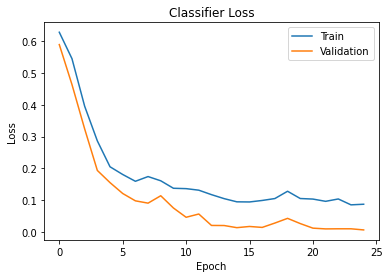

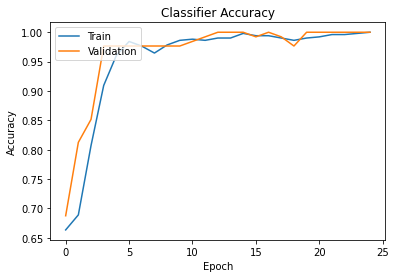

In [84]:
hist=history
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Classifier Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='upper right')
plt.show()

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Classifier Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()



In [ ]:
################# Ideal Theshold Calculation ############################

import numpy as np

def roc_curve(y_test, y_prob, thresholds):

    fpr = []
    tpr = []
    
    for threshold in thresholds:

        y_pred = np.where(y_prob >= threshold, 1, 0)

        fp = np.sum((y_pred == 1) & (y_test== 0))
        tp = np.sum((y_pred == 1) & (y_test == 1))

        fn = np.sum((y_pred == 0) & (y_test == 1))
        tn = np.sum((y_pred == 0) & (y_test == 0))

        fpr.append(fp / (fp + tn))
        tpr.append(tp / (tp + fn))

    return [fpr, tpr]

y_prob1 = model.predict(X_test).ravel()
thresholds1= list(np.arange(-1, 1, 0.001))
[fpr1,tpr1]=roc_curve(y_test,y_prob1, thresholds1)
thresholds1=np.array(thresholds1)
tpr1=np.array(tpr1)
fpr1=np.array(fpr1)
import pandas as pd
i = np.arange(len(tpr1)) 
roc1 = pd.DataFrame({'tf' : pd.Series(tpr1-(1-fpr1), index=i), 'thresholds1' : pd.Series(thresholds1, index=i)})
ideal_roc_thresh1 = roc1.iloc[(roc1.tf-0).abs().argsort()[:1]]  #Locate the point where the value is close to 0
print("Ideal threshold is: ", ideal_roc_thresh1['thresholds1'])

In [ ]:
############## Confusion Matrix Calculation###################

series_list=ideal_roc_thresh1['thresholds1'].tolist()
mythreshold=series_list[0]
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, plot_roc_curve

y_prob=model.predict(X_test)
y_pred = ((y_prob)>= mythreshold).astype(int)
y_pred1=y_pred
cm=confusion_matrix(y_test, y_pred)    #################### Confusion Matrix
print(cm)


1.0


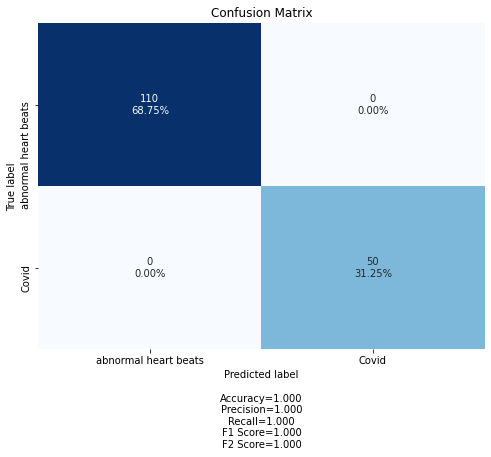

In [87]:
#################Confusion Metrics plot ###################################


from sklearn.metrics import confusion_matrix
from make_confusion_matrix import make_confusion_matrix
from calc_precision_recall import calc_precision_recall
TP,TN,FP,FN,precision, recall=calc_precision_recall(y_test, y_pred)

f2_score=(5*precision*recall) / ((4*precision) + recall)
print(f2_score)

cm=confusion_matrix(y_test_label,y_pred)
make_confusion_matrix(cm, figsize=(8,6), cbar=False,title="Confusion Matrix",categories=['abnormal heart beats',"Covid"])

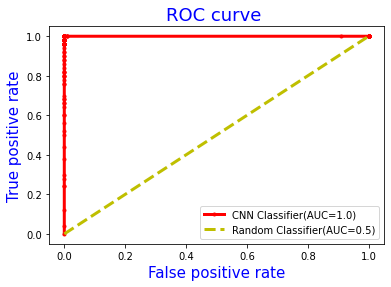

In [88]:
############################################### ROC Curve



plt.plot(fpr1, tpr1,linewidth=3, marker='.', color='Red')
plt.plot([0, 1], [0, 1], 'y--',linewidth=3)
plt.xlabel('False positive rate', fontsize=15, color='Blue')
plt.ylabel('True positive rate',fontsize=15,color='Blue')
plt.title('ROC curve ',fontsize=18,color='Blue')
plt.legend(['CNN Classifier(AUC=1.0)','Random Classifier(AUC=0.5)'],loc='lower right', fontsize=10)
plt.show()


In [ ]:
###### Inference Time #############################
Number_of_samples=len(y_test)
import time
start_time=time.time()
y_preds = model.predict(X_test)
total_time=time.time()-start_time
print(total_time)
# Inference Time
Inference=total_time/Number_of_samples
print(Inference)
# Frames Per Second                    
FPS=1/Inference
print(["FPS=",FPS])

print("Inference Time = ", Inference)
print("FPS = ", FPS)

In [101]:
y_pred = (model.predict(X_test)>= mythreshold).astype(int)
TP,TN,FP,FN,precision, recall = calc_precision_recall(y_test, y_pred)
Accuracy=((TP+TN)/(TP+TN+FP+FN))*100
Sensitivity=(TP/(TP+FN))*100
Specificity=(TN/(TN+FP))*100
Precision=(TP/(TP+FP))*100
Recall= Sensitivity
f2_score=((5*Precision*Recall) / ((4*Precision) + Recall))/100


##################### AUC ################

y_preds = model.predict(X_test).ravel()

fpr, tpr, thresholds = roc_curve(y_test, y_preds)
from sklearn.metrics import auc
auc_value = auc(fpr, tpr)



import pandas as pd
# assign values to lists.  
data = [{'Model':'Model1','Accuracy': Accuracy,'Precision':Precision, 'Sensitivity': Sensitivity, 'Specificity':Specificity,'F2-score':f2_score,'ROC-AUC':auc_value}]  
  
# Creates DataFrame.  
df = pd.DataFrame(data)  
df.index+=1
# Print the data  
print(df)
print("Ideal threshold =", mythreshold)

    Model  Accuracy  Precision  Sensitivity  Specificity  F2-score  ROC-AUC
1  Model1     100.0      100.0        100.0        100.0       1.0      1.0
Ideal threshold = 0.1110000000000011
